In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from Load_model import CNN_Net
import torchvision.datasets
from torchvision import datasets, transforms

In [13]:
# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_state_dict = torch.load('mnist_cnn_model.pth', map_location=device)

# Get all parameters
params = list(model_state_dict.items())
n_params = len(params)

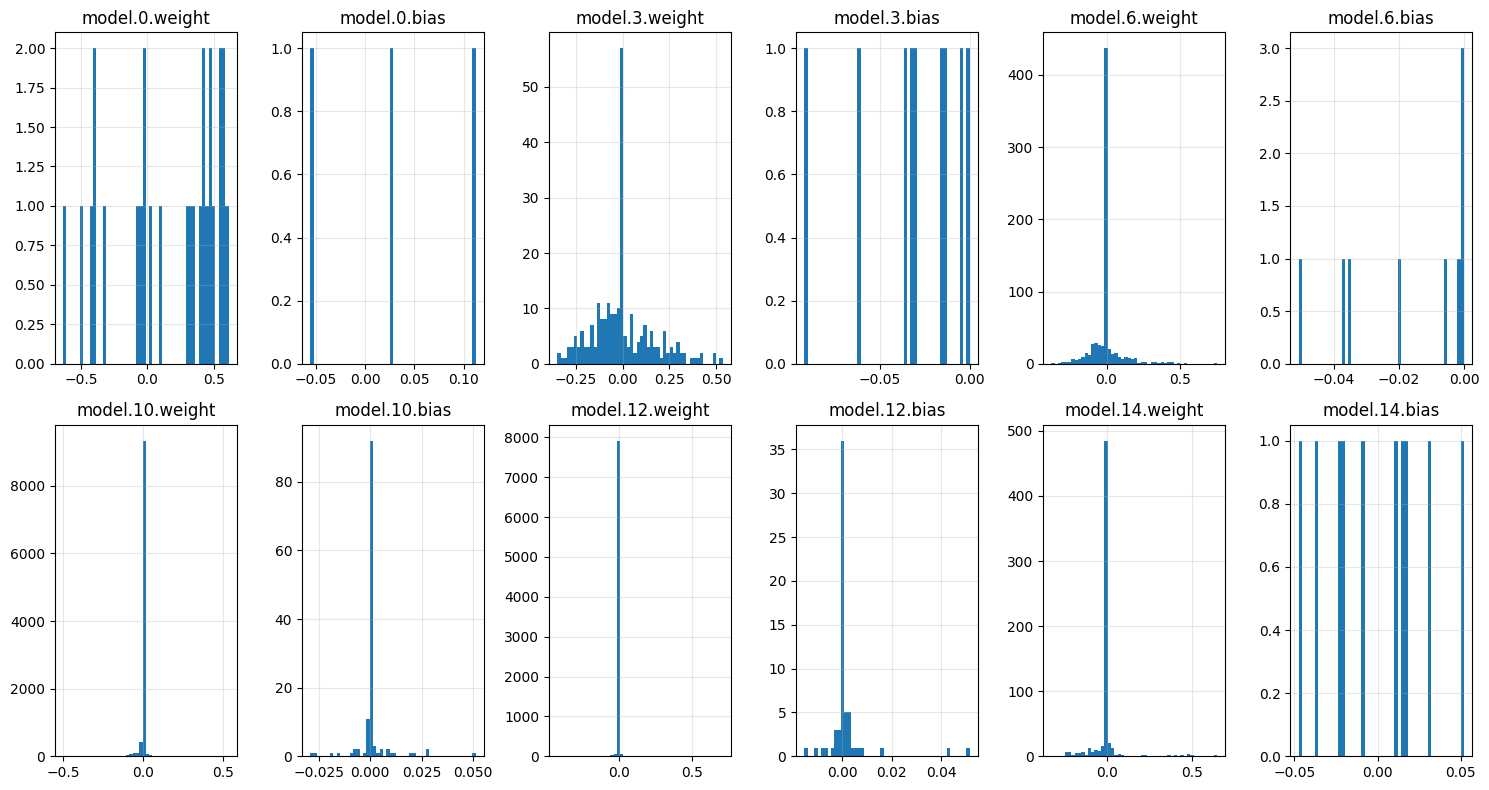

In [14]:
# Create subplots
fig, axes = plt.subplots(2, (n_params + 1) // 2, figsize=(15, 8))
axes = axes.flatten() if n_params > 1 else [axes]

# Plot each parameter
for i, (name, tensor) in enumerate(params):
    values = tensor.cpu().numpy().flatten()
    axes[i].hist(values, bins=50)
    axes[i].set_title(name)
    axes[i].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


In [16]:
from extractor import Extractor

model = CNN_Net()
model_state_dict = torch.load('mnist_cnn_model.pth', map_location='cpu')

extractor = Extractor(list(model.children()))
extractor.activate()


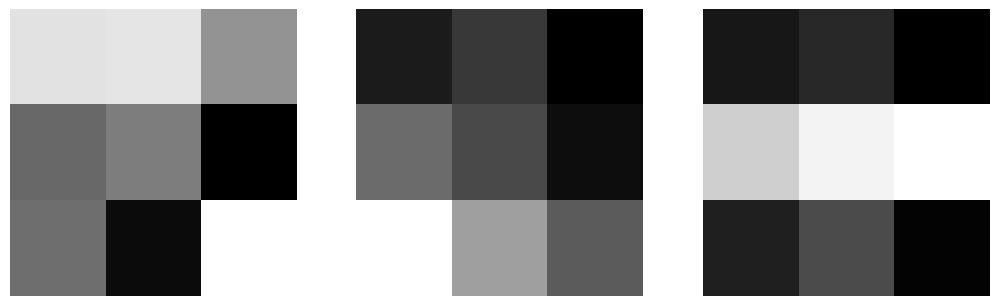

In [17]:
# Visualising the filters
plt.figure(figsize=(35, 35))
for index, filter in enumerate(extractor.CNN_weights[0]):
    plt.subplot(8, 8, index + 1)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')

plt.show()

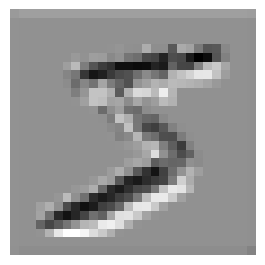

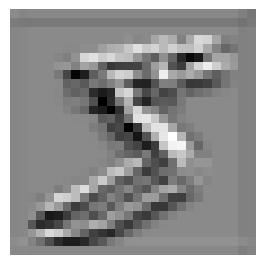

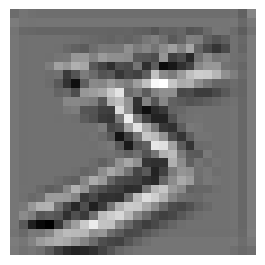

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))]
)

train_dataset = torchvision.datasets.MNIST(
        root='./data',        
        train=True,           
        download=True,        
        transform=transform  
)

image, label = train_dataset[0]

featuremaps = [extractor.CNN_layers[0](image)]
for x in range(1, len(extractor.CNN_layers)):
    featuremaps.append(extractor.CNN_layers[x](featuremaps[-1]))

# Visualising the featuremaps
for x in range(len(featuremaps)):
    plt.figure(figsize=(30, 30))
    layers = featuremaps[x][0, :, :].detach()
    plt.subplot(8, 8, i + 1)
    plt.imshow(layers, cmap='gray')
    plt.axis('off')

plt.show()